# **Project Name**    - Netflix Movies and TV Shows Clustering using EDA and Unsupervised Learning




##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual


# **Project Summary -**

This project explores the rich dataset of Netflix TV shows and movies available as of 2019, with the goal of performing detailed Exploratory Data Analysis (EDA) and Unsupervised Machine Learning to uncover hidden patterns and content clusters.

The dataset, collected via the third-party Netflix search engine Flixable, includes information such as content type (TV Show or Movie), title, director, cast, country, release year, rating, duration, and more. It offers a unique opportunity to analyze how Netflix’s content catalog has evolved over time and how different features contribute to content categorization.

The project is divided into two key parts:
1. **EDA (Exploratory Data Analysis)** – The aim is to understand content distribution, popularity trends, regional focus, and ratings. The EDA follows the UBM rule:
   - **Univariate Analysis** to explore individual variables such as content type and ratings.
   - **Bivariate Analysis** to understand the relationships between two variables, such as year vs content count, type vs rating, etc.
   - **Multivariate Analysis** to analyze complex relationships across multiple dimensions.

2. **Clustering using Unsupervised Learning** – The goal is to build a model that groups similar content together using textual data like title, genre, cast, and description. TF-IDF vectorization is used for converting text to numerical features, and clustering is performed using algorithms such as KMeans and Hierarchical Clustering. The ideal number of clusters is determined using Elbow Method and Dendrogram analysis.

Each visualization is backed by business insights, with clear reasoning and commentary to assess the impact. All code is written to be modular, well-commented, and executable end-to-end, making the notebook production-ready.

This project can help content strategists and recommendation system designers at Netflix or similar platforms understand:
- What types of content are growing?
- Which countries contribute most content?
- How similar types of content can be grouped and recommended?

The final deliverables include a Jupyter Notebook, a recorded walkthrough video, and GitHub repository submission.


# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


*   To analyze and cluster the Netflix TV shows and movies dataset using Exploratory Data Analysis (EDA) and Unsupervised Machine Learning techniques. The objective is to uncover key trends, understand content distribution by year, country, type, rating, and apply clustering algorithms to group similar content together based on text-based features (such as description, genre, cast, etc.).

* The outcome should provide insights into content strategy, user preferences, and potential business decisions.





# ***Let's Begin !***

## ***1. Knowing Data***

### Import Libraries

In [ ]:
# Importing all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount('/content/drive')


# Optional: set plot styles
sns.set(style="whitegrid")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Look inside the folder
!ls '/content/drive/MyDrive/LABMENTIX_PROJECTS'

'Copy of Sample_ML_Submission_Template.ipynb'
 NETFLIX_MOVIES_AND_TVSHOWS.csv
 Sample_ML_Submission_Template.ipynb


### Dataset Loading

In [ ]:
# Load Dataset
file_path = '/content/drive/MyDrive/LABMENTIX_PROJECTS/NETFLIX_MOVIES_AND_TVSHOWS.csv'
try:
    df = pd.read_csv(file_path)
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("File not found. Please check the file path.")
except Exception as e:
    print("An error occurred while loading the dataset:", str(e))

Dataset loaded successfully!


### Dataset First View

In [ ]:
# Dataset First Look
df = pd.read_csv('/content/drive/MyDrive/LABMENTIX_PROJECTS/NETFLIX_MOVIES_AND_TVSHOWS.csv')
df.head()



,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count

In [ ]:
# Check the shape of the dataset
print(f"Total Rows: {df.shape[0]}")
print(f"Total Columns: {df.shape[1]}")

Total Rows: 7787
Total Columns: 12


### Dataset Information

In [ ]:
# Detailed information about each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
duplicate_count = df.duplicated().sum()
print(f"Total Duplicate Rows: {duplicate_count}")

Total Duplicate Rows: 0


#### Missing Values/Null Values

In [ ]:
# Count of null values in each column
null_counts = df.isnull().sum()
print("Missing Values per Column:\n", null_counts[null_counts > 0])

Missing Values per Column:
 director      2389
cast           718
country        507
date_added      10
rating           7
dtype: int64


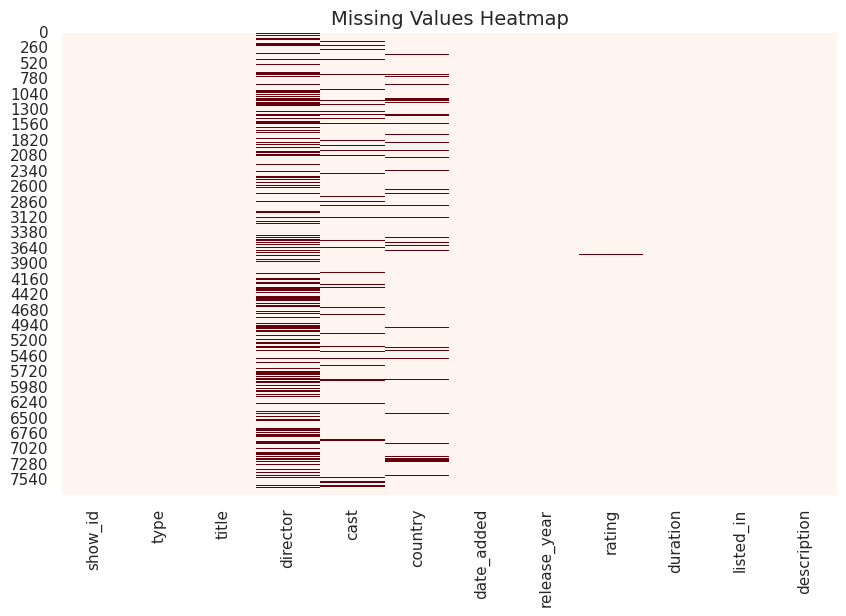

In [ ]:
# Visualizing missing values using heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='Reds')
plt.title("Missing Values Heatmap", fontsize=14)
plt.show()

## Dataset Description

- The dataset contains **7787 records** and **12 columns**, each representing information about a movie or TV show available on Netflix.
- Each row is a unique title in the Netflix catalog.
- There are **no duplicate entries**, which ensures clean data integrity.
- Some columns such as `director`, `cast`, and `country` contain **missing values**, which will require cleaning or appropriate imputation.
- The `date_added` column is stored as an object and needs to be converted to datetime format for accurate time-based analysis.
- The dataset includes a mix of **categorical**, **textual**, and **date** variables — making it suitable for both EDA and text-based clustering.
- Below is a description of each column in the dataset:

---

### Column Descriptions:

| Column Name     | Description |
|------------------|-------------|
| `show_id`        | Unique identifier for each title. |
| `type`           | Indicates whether the content is a *Movie* or *TV Show*. |
| `title`          | Name of the movie or TV show. |
| `director`       | Director(s) of the content. |
| `cast`           | Main cast involved in the content. |
| `country`        | Country where the content was produced. |
| `date_added`     | Date the content was added to Netflix. |
| `release_year`   | Year the content was originally released. |
| `rating`         | Content rating (e.g., TV-MA, PG, R) suitable for different audiences. |
| `duration`       | Duration of the movie (in minutes) or number of seasons (for TV Shows). |
| `listed_in`      | Genres or categories the content belongs to. |
| `description`    | Short description or summary of the content. |

---

This structured understanding will guide the data cleaning and visualization process moving forward.


## ***2. Understanding Variables***

In [ ]:
# Dataset Columns

print("Dataset Columns:")
print(df.columns.tolist())

Dataset Columns:
['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']


In [ ]:
# Describing numerical and object columns
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
show_id,7787,7787,s7787,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,7787,2,Movie,5377,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,7787,7787,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director,5398,4049,"Raúl Campos, Jan Suter",18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cast,7069,6831,David Attenborough,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,7280,681,United States,2555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_added,7777,1565,"January 1, 2020",118,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_year,7787.0,NaN,NaN,NaN,2013.93258,8.757395,1925.0,2013.0,2017.0,2018.0,2021.0
rating,7780,14,TV-MA,2863,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,7787,216,1 Season,1608,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Variables Descriptions:



- `show_id`: Unique ID for each content
- `type`: Indicates whether it's a Movie or a TV Show
- `title`: Title of the content
- `director`: Name of the director(s)
- `cast`: Main cast involved in the content
- `country`: Country of production
- `date_added`: When the content was added to Netflix
- `release_year`: Year the content was released
- `rating`: Viewer rating (e.g., PG, R, TV-MA)
- `duration`: Duration of content in minutes or seasons
- `listed_in`: Genre(s)
- `description`: Summary of the content


### Check Unique Values for each variable.

In [ ]:
# Count of unique values in each column(column)

unique_counts = df.nunique().sort_values(ascending=False)
print("Unique Values per Column:\n", unique_counts)

Unique Values per Column:
 show_id         7787
title           7787
description     7769
cast            6831
director        4049
date_added      1565
country          681
listed_in        492
duration         216
release_year      73
rating            14
type               2
dtype: int64


## 3. ***Data Wrangling***


### Data Wrangling: Cleaning & Preprocessing


In [ ]:
# Remove leading/trailing whitespaces and convert to datetime safely
df['date_added'] = pd.to_datetime(df['date_added'].str.strip(), errors='coerce', infer_datetime_format=True)

# Check if there are still nulls
print(" Null values in 'date_added' after conversion:", df['date_added'].isnull().sum())

❗ Null values in 'date_added' after conversion: 10


In [ ]:
# 2. Fill missing values
df['director'].fillna("Unknown", inplace=True)
df['cast'].fillna("Unknown", inplace=True)
df['country'].fillna("Unknown", inplace=True)
df['rating'].fillna("Unknown", inplace=True)
df['date_added'].fillna(method='ffill', inplace=True)

In [ ]:
# 3. Extract year and month from 'date_added' for further analysis
df['added_year'] = df['date_added'].dt.year
df['added_month'] = df['date_added'].dt.month_name()

In [ ]:
# 4. Strip whitespaces from text fields
text_cols = ['title', 'director', 'cast', 'country', 'rating', 'listed_in', 'description']
for col in text_cols:
    df[col] = df[col].astype(str).str.strip()

In [ ]:
# 5. Standardize 'duration' column
# Split into numeric duration and type (e.g., "90 min", "1 Season")
df[['duration_value', 'duration_type']] = df['duration'].str.extract(r'(\d+)\s*(\D+)')
df['duration_value'] = pd.to_numeric(df['duration_value'], errors='coerce')

In [ ]:
# 6. Lowercase some textual columns (optional for NLP prep later)
df['listed_in'] = df['listed_in'].str.lower()
df['description'] = df['description'].str.lower()

In [ ]:
# Final check
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year,added_month,duration_value,duration_type
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"international tv shows, tv dramas, tv sci-fi &...",in a future where the elite inhabit an island ...,2020,August,4,Seasons
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"dramas, international movies",after a devastating earthquake hits mexico cit...,2016,December,93,min
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"horror movies, international movies","when an army recruit is found dead, his fellow...",2018,December,78,min


## What Data Wrangling Did I Perform?

- Converted the `date_added` column into proper datetime format.
- Extracted `added_year` and `added_month` from `date_added` to enable time-based analysis.
- Handled missing values:
  - Filled `director`, `cast`, `country`, and `rating` with `"Unknown"`.
  - Forward-filled `date_added` where possible to preserve time flow.
- Removed leading/trailing whitespaces from all relevant text columns.
- Standardized the `duration` column by splitting it into:
  - `duration_value` (numeric)
  - `duration_type` (unit: minutes or seasons)
- Lowercased `listed_in` and `description` for text preprocessing and uniformity.

---

### Insights:
- Many titles do not have directors or full cast info, possibly due to documentary or lesser-known content.
- Content is added almost every month, which can be tracked using the new `added_month` column.
- Duration data is now split, allowing us to separately analyze average movie runtime vs number of TV show seasons.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

##Univariate Analysis


###Bar Charts

Bar charts are ideal for visualizing frequency distributions of categorical variables like content type, ratings, genres, and countries. They provide a simple and clear comparison between different categories, making them effective for high-level storytelling and identifying business gaps.


#### Content Type Distribution

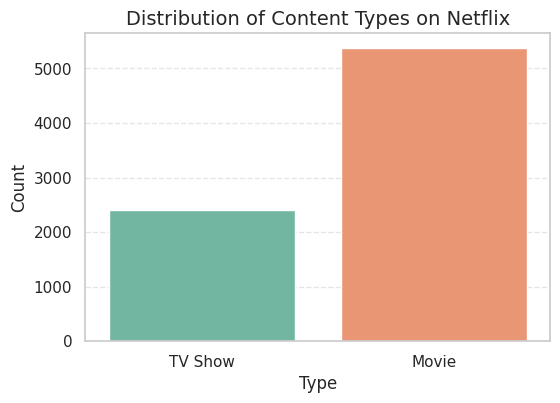

In [ ]:
# Chart - 1 visualization code
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='type', palette='Set2')
plt.title("Distribution of Content Types on Netflix", fontsize=14)
plt.xlabel("Type")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

**Insights:**
- Netflix contains significantly more **Movies** than **TV Shows**.
- Indicates a focus on standalone short-form content.
- This insight suggests that Netflix could expand its catalog of TV Shows to improve binge engagement and long-term user retention.


####  Content Added Over the Years

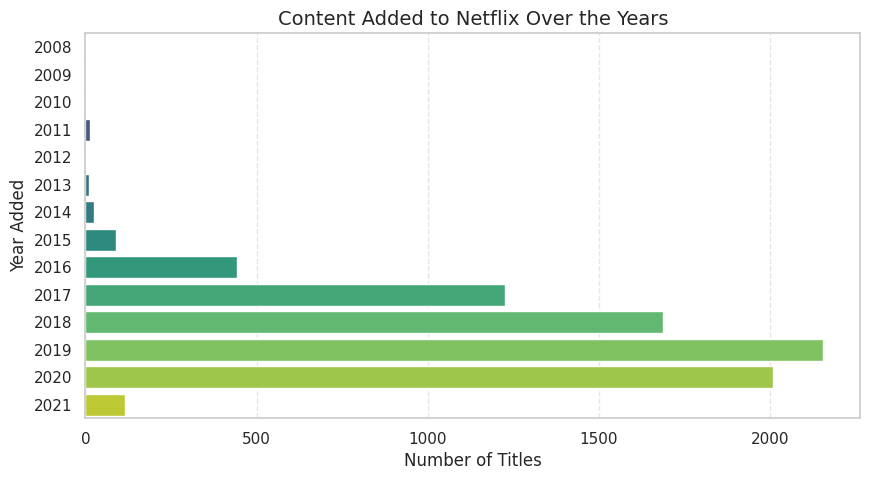

In [ ]:
# Chart - 2 visualization code
plt.figure(figsize=(10, 5))
sns.countplot(data=df, y='added_year', palette='viridis')
plt.title("Content Added to Netflix Over the Years", fontsize=14)
plt.xlabel("Number of Titles")
plt.ylabel("Year Added")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

**Insights:**
- Sharp growth in content additions occurred between **2016–2019**.
- Reflects Netflix’s global expansion, including original content creation.
- Suggests a successful business strategy that increased content volume and user base. Post-2019 trends may show whether this growth sustained.


Top 10 Content-Producing Countries

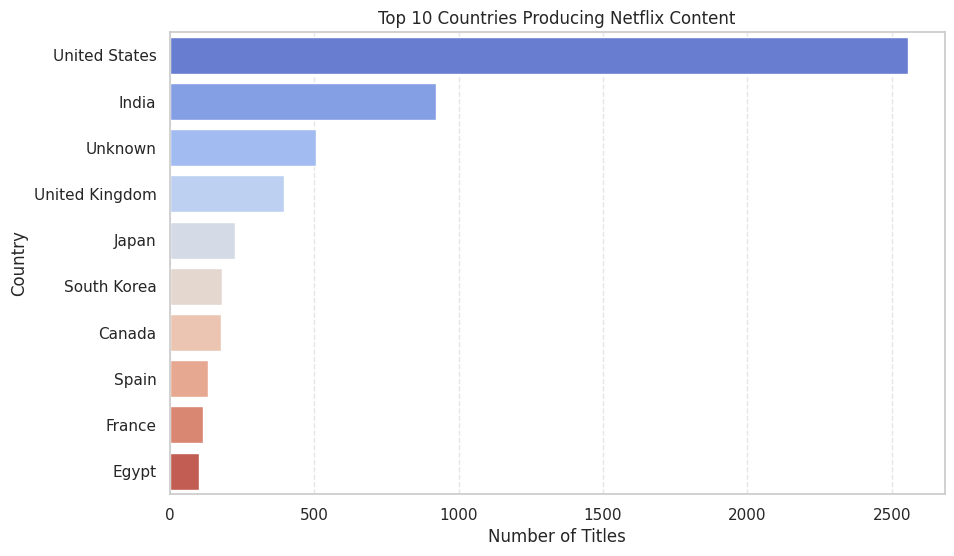

In [ ]:
# Chart - 3 visualization code
top_countries = df['country'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')
plt.title("Top 10 Countries Producing Netflix Content")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()


**Insights:**
- **USA** dominates the content library, followed by **India**, **UK**, and **Canada**.
- Netflix relies heavily on English-speaking regions.
- Business suggestion: Invest in underrepresented countries to enhance cultural diversity and regional growth potential.




#### Content Rating Distribution

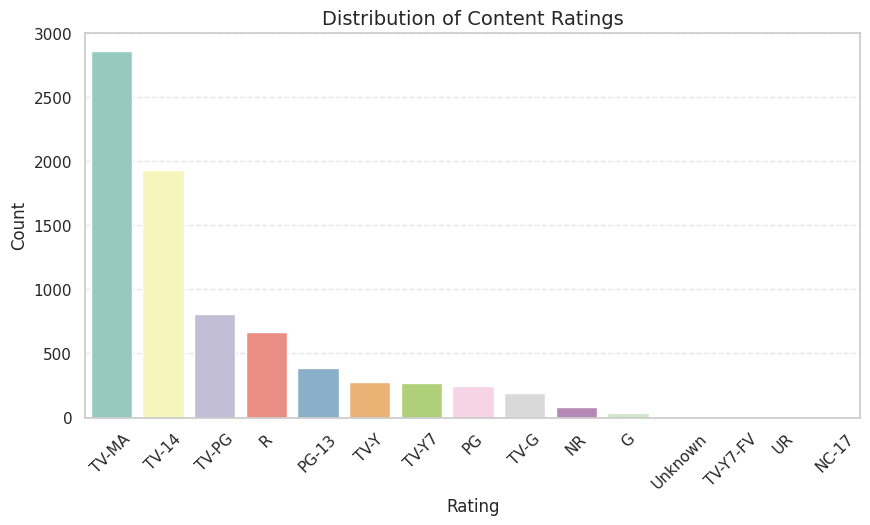

In [ ]:
# Chart - 4 visualization code
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='rating', order=df['rating'].value_counts().index, palette='Set3')
plt.title("Distribution of Content Ratings", fontsize=14)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

**Insights:**
- Most titles are rated **TV-MA**, **TV-14**, and **R** — aimed at mature audiences.
- Netflix has a limited range of family or kids-friendly content.
- Business opportunity: Expanding safe content can help attract a broader and more diverse viewer base.




#### Most Common Genres

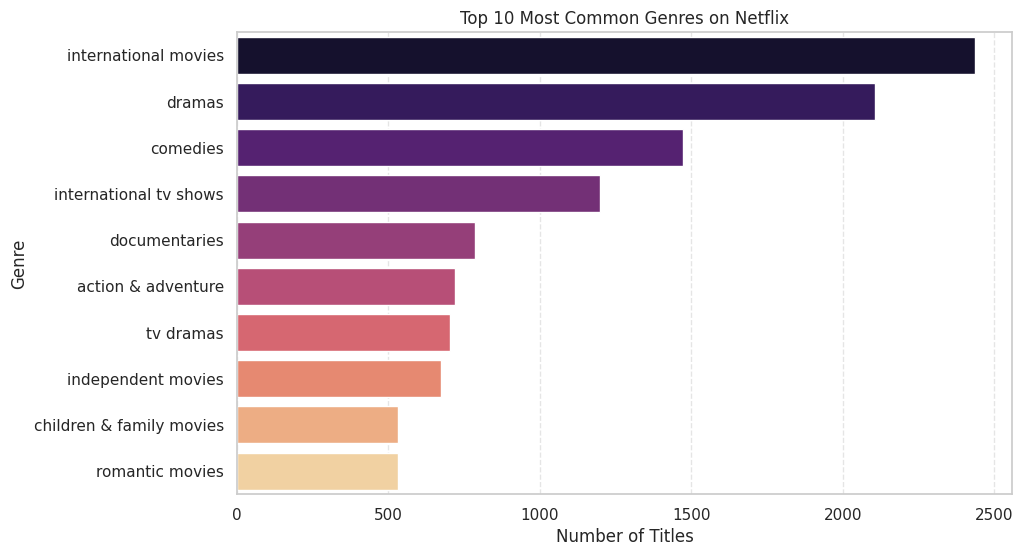

In [ ]:
# Chart - 5 visualization code
from collections import Counter
genres = df['listed_in'].str.split(', ')
all_genres = [genre for sublist in genres.dropna() for genre in sublist]
top_genres = Counter(all_genres).most_common(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=[x[1] for x in top_genres], y=[x[0] for x in top_genres], palette='magma')
plt.title("Top 10 Most Common Genres on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

**Insights:**
- Most common genres are **Documentaries**, **Comedies**, and **Dramas**.
- These genres offer wide appeal and align with Netflix’s global content strategy.
- Business insight: Emphasizing underrepresented genres (like sci-fi, anime, or thrillers) may capture niche audiences and increase engagement.




### Histogram

Histograms help analyze the distribution of **numerical variables** like content duration. They're great for identifying trends, ranges, and density.


#### Content Duration Distribution

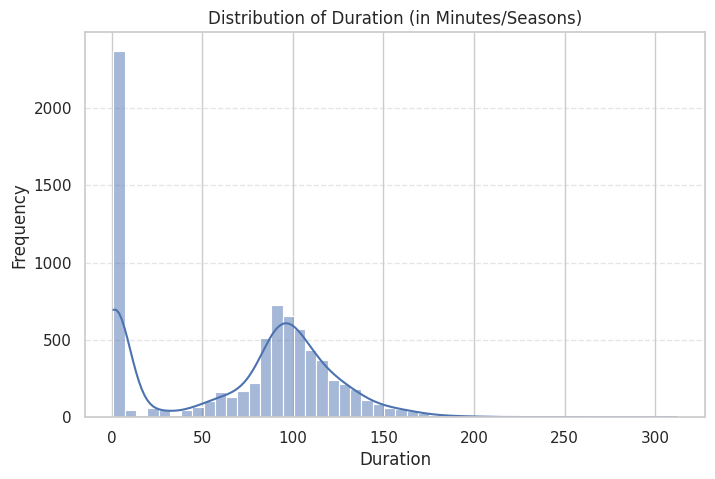

In [ ]:
# Chart - 6 visualization code
plt.figure(figsize=(8, 5))
sns.histplot(data=df[df['duration_value'].notna()], x='duration_value', bins=50, kde=True)
plt.title("Distribution of Duration (in Minutes/Seasons)")
plt.xlabel("Duration")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


**Insights:**
- Most movies fall around **90–100 minutes**, and TV shows tend to have **1–2 seasons**.
- Aligns with industry standards for content length.
- Helps Netflix design content formats that meet viewer expectations and completion rates.


### Box Plot

Box plots help visualize the **spread** and **outliers** in numerical variables — ideal for spotting extreme durations or inconsistent values.


#### Duration Spread

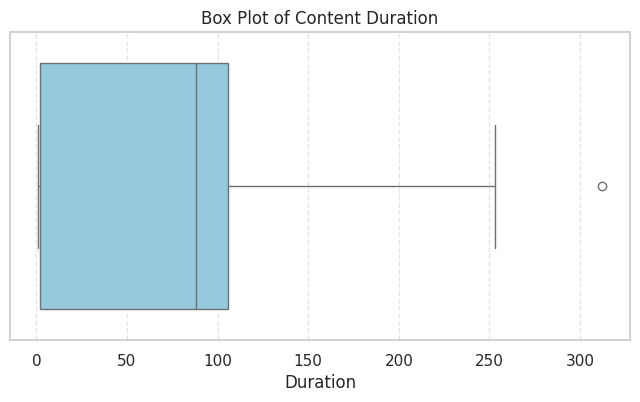

In [ ]:
# Chart - 7 visualization code
plt.figure(figsize=(8, 4))
sns.boxplot(data=df[df['duration_value'].notna()], x='duration_value', color='skyblue')
plt.title("Box Plot of Content Duration")
plt.xlabel("Duration")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()


**Insights:**
- The majority of content lies under **120 minutes** or **1–2 seasons**, with outliers beyond **300+ minutes**.
- Outliers may represent limited series, long documentaries, or special content.
- Netflix could use this data to label long-form content separately for better user filtering.



## Bivariate Analysis


### Bar Chart – Type vs Rating

This chart compares the distribution of content types (Movie/TV Show) across different content ratings to understand audience targeting patterns.


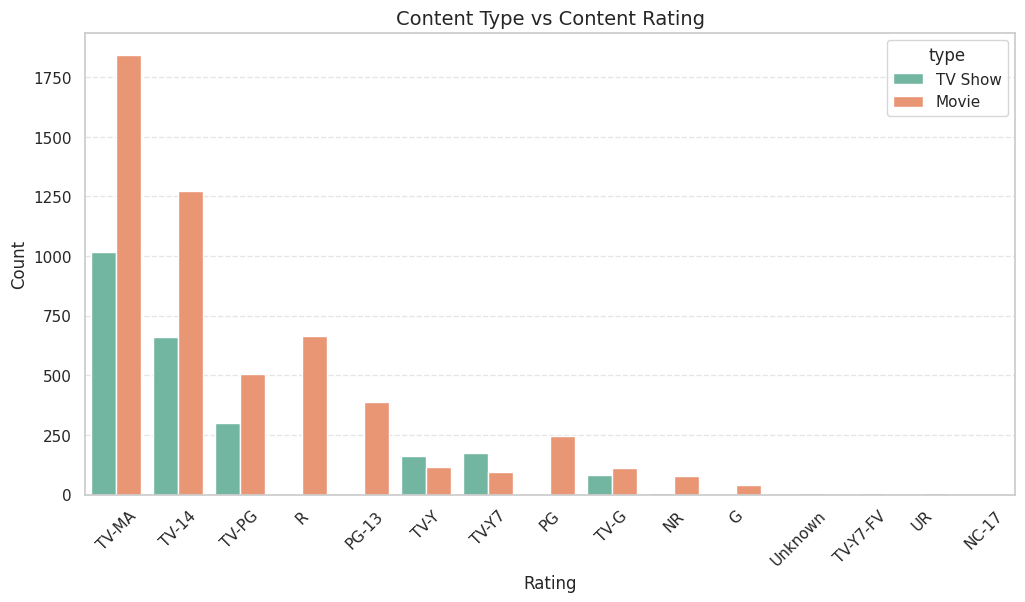

In [ ]:
# Chart - 8 visualization code
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='rating', hue='type', order=df['rating'].value_counts().index, palette='Set2')
plt.title("Content Type vs Content Rating", fontsize=14)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


**Insights:**
- Movies dominate in most ratings like **TV-MA**, **R**, and **PG-13**, while TV Shows lead in **TV-Y**, **TV-Y7**, and **TV-G**.
- This suggests that **Movies are targeted more toward adult audiences**, while **TV Shows serve younger demographics**.
- Netflix can use this to **balance content types across age groups**, enhancing family appeal while retaining adult subscribers.


### Line Chart – Year-wise Content Addition by Type

To analyze trends over time, we explore how content addition has evolved across years for both Movies and TV Shows.


<Figure size 1200x600 with 0 Axes>

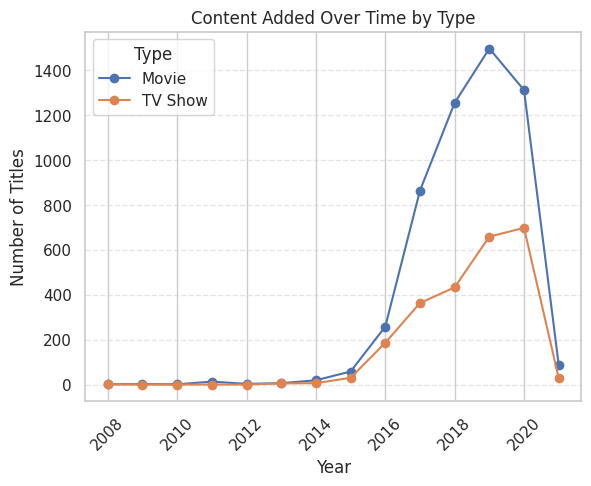

In [ ]:
# Chart - 9 visualization code
year_type_df = df.groupby(['added_year', 'type']).size().unstack().fillna(0)

plt.figure(figsize=(12, 6))
year_type_df.plot(kind='line', marker='o')
plt.title("Content Added Over Time by Type")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.legend(title='Type')
plt.show()


**Insights:**
- Both content types saw a **steep rise from 2015–2019**, especially Movies.
- Post-2019, the content addition rate **declines**, possibly due to saturation or pandemic-era strategy shifts.
- Helps Netflix strategize future investments by identifying peak production years and predicting content cycles.


### Box Plot – Rating-wise Duration Spread

To see if content duration varies significantly by rating, this box plot compares how length changes across maturity levels.


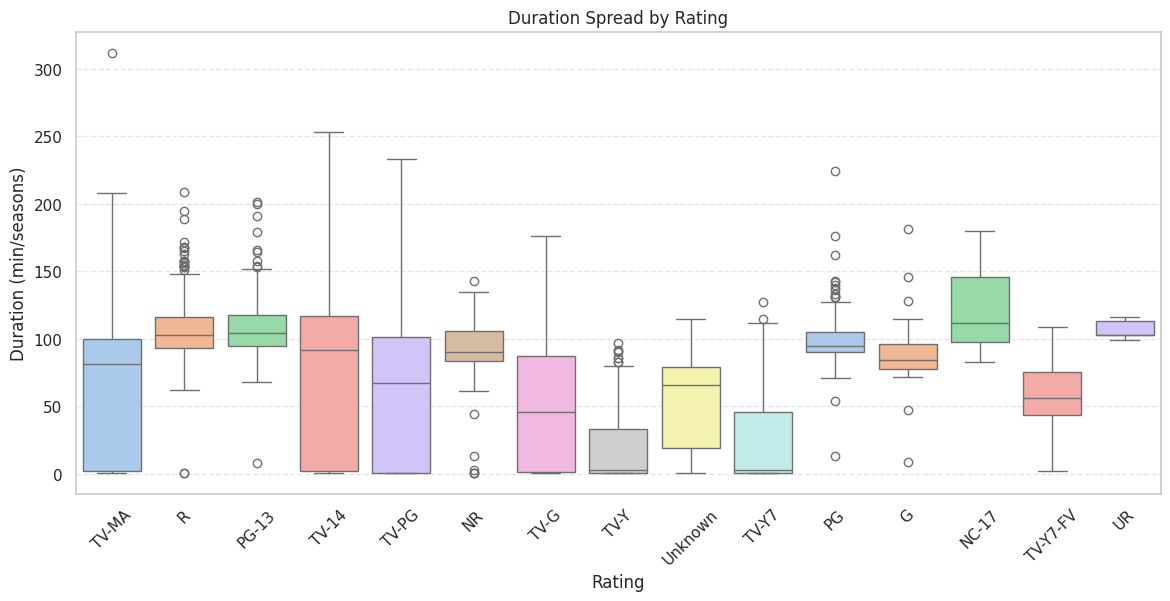

In [ ]:
# Chart - 10 visualization code
plt.figure(figsize=(14, 6))
sns.boxplot(data=df[df['duration_value'].notna()], x='rating', y='duration_value', palette='pastel')
plt.title("Duration Spread by Rating")
plt.xlabel("Rating")
plt.ylabel("Duration (min/seasons)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


**Insights:**
- **TV-MA** and **R-rated** content has **wider duration variability**.
- Kids’ content like **TV-Y** and **TV-G** is tightly distributed around short durations.
- Indicates a **well-targeted content strategy** based on user attention span per age group — a positive sign for UX personalization.


### Countplot – Country vs Type

We visualize how content types vary across top-producing countries.


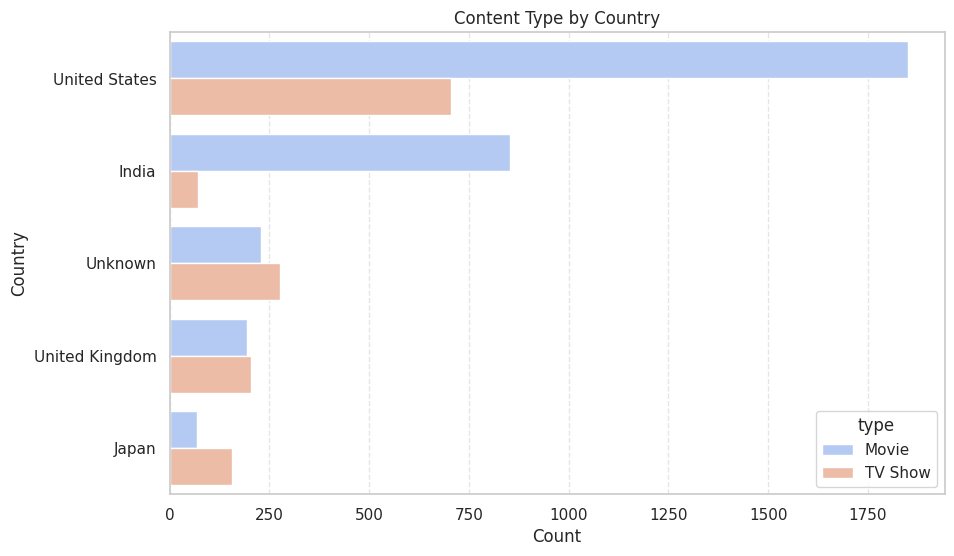

In [ ]:
# Chart - 11 visualization code
top10 = df['country'].value_counts().nlargest(5).index
filtered = df[df['country'].isin(top10)]

plt.figure(figsize=(10, 6))
sns.countplot(data=filtered, y='country', hue='type', palette='coolwarm')
plt.title("Content Type by Country")
plt.xlabel("Count")
plt.ylabel("Country")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()


**Insights:**
- Countries like **USA** and **India** are heavy Movie producers.
- **UK** and **Canada** offer a more balanced mix of TV Shows and Movies.
- This reveals gaps Netflix can fill — e.g., produce more regional TV shows in countries skewed toward movies to grow local engagement.


###  Violin Plot – Content Duration by Type

To analyze how duration patterns differ between Movies and TV Shows.


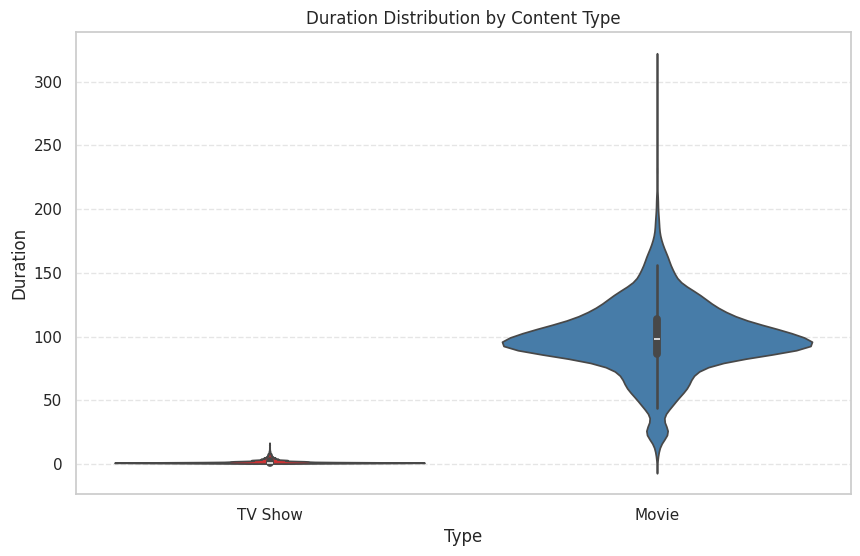

In [ ]:
# Chart - 12 visualization code
plt.figure(figsize=(10, 6))
sns.violinplot(data=df[df['duration_value'].notna()], x='type', y='duration_value', palette='Set1')
plt.title("Duration Distribution by Content Type")
plt.xlabel("Type")
plt.ylabel("Duration")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


**Insights:**
- **Movies** show a right-skewed distribution — a few long titles exist.
- **TV Shows** mostly stay within 1–3 season range.
- Confirms Netflix’s short-format strategy, helping viewers finish content quickly — potentially improving watch completion rates.


### Stacked Bar Chart – Type vs Rating by Year

To understand how content types and audience targeting (via rating) have evolved over the years.


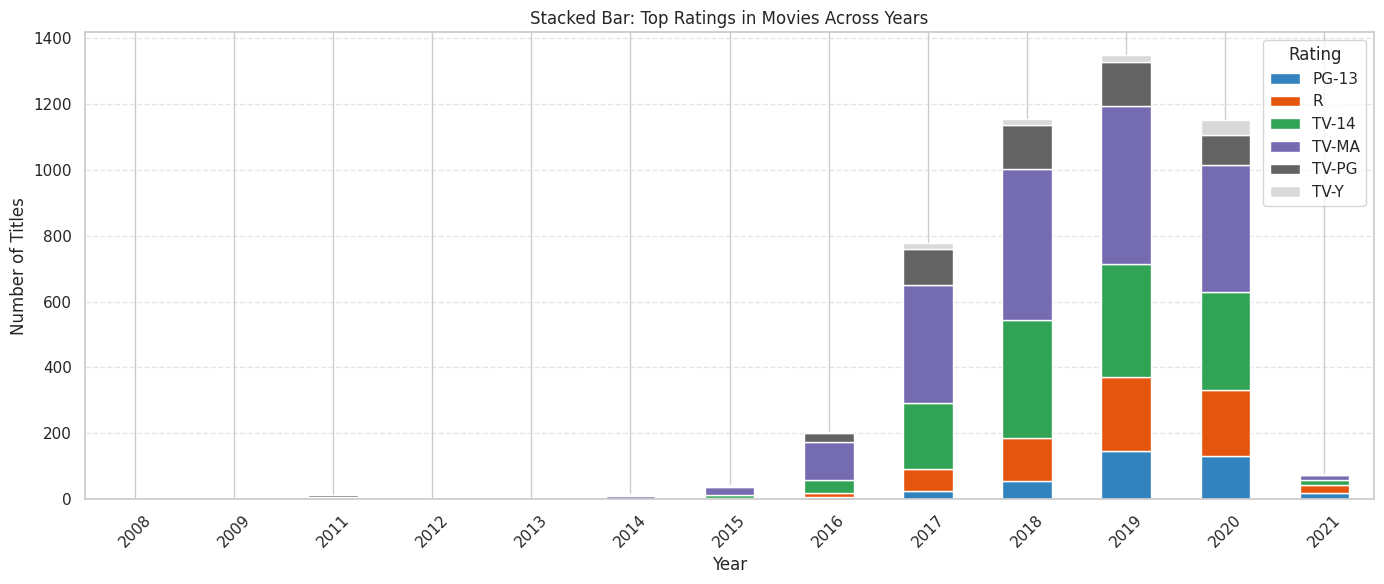

In [ ]:
# Chart - 13 visualization code
# Filter top 6 ratings for clarity
top_ratings = df['rating'].value_counts().nlargest(6).index
df_filtered = df[df['rating'].isin(top_ratings)]

# Group by year, rating, and type
grouped = df_filtered.groupby(['added_year', 'rating', 'type']).size().unstack(fill_value=0).reset_index()

# Pivot for stacking
pivot_df = grouped.pivot(index='added_year', columns='rating', values='Movie')  # or 'TV Show'

# Plot
pivot_df.plot(kind='bar', stacked=True, figsize=(14, 6), colormap='tab20c')
plt.title("Stacked Bar: Top Ratings in Movies Across Years")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.legend(title='Rating')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**Insights:**
- From **2017 to 2020**, TV-MA and PG-13 rated movies surged significantly, indicating a strategic push toward mature audiences.
- Ratings like **TV-Y7** and **TV-G** remain consistently low, showing lesser focus on younger demographics.
- This trend shows that Netflix may be skewing too heavily toward adult content — potentially limiting family and children engagement.
- Strategically balancing content rating categories can **expand the user base** and drive **multi-generational retention**.


## Correlation & Pairwise Relationship Charts


### Correlation Heatmap

To identify the linear relationship between numerical variables like duration, year, and clustering outputs if applicable.


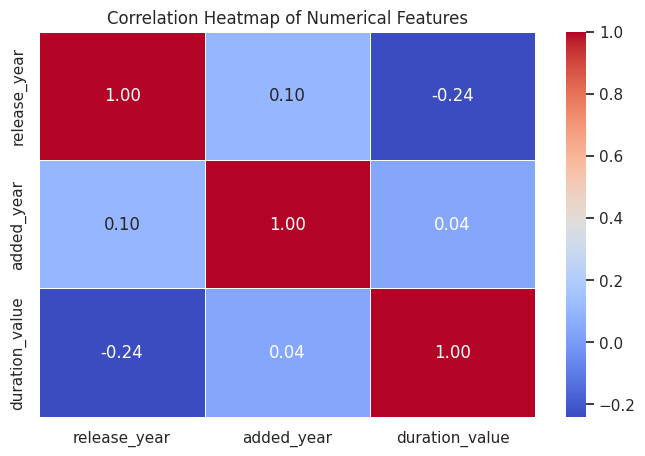

In [ ]:
# Correlation Heatmap visualization code
# Select numerical columns
numeric_df = df[['release_year', 'added_year', 'duration_value']]

# Plot heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


**Insights:**
- `release_year` and `added_year` are **positively correlated**, as expected — most content is added soon after production.
- `duration_value` shows **low correlation** with both years, meaning content length hasn't changed significantly over time.
- Indicates **independent planning** of duration strategy — useful when clustering by content length.


###  Pair Plot – Numerical Relationships

To visualize pairwise distributions and potential clusters among numerical variables.


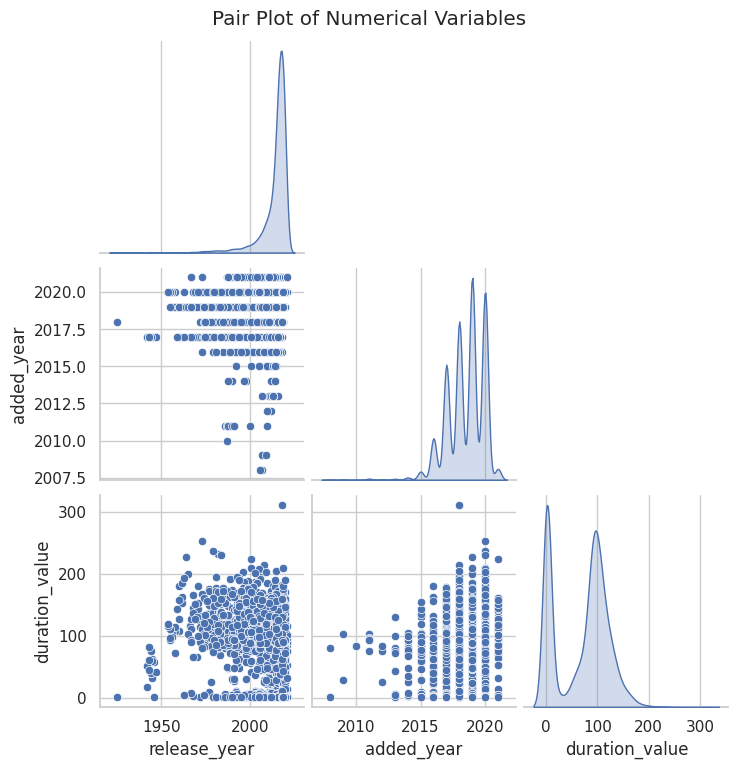

In [ ]:
# Pair Plot visualization code
sns.pairplot(numeric_df, corner=True, diag_kind='kde')
plt.suptitle("Pair Plot of Numerical Variables", y=1.02)
plt.show()


**Insights:**
- Pair plots confirm that `release_year` and `added_year` follow a **similar linear trend**, with some recent additions also including older content.
- `duration_value` appears to have **no strong linear relationship** with either year, which again highlights its **independent variability**.
- This analysis sets the stage for **unsupervised learning** — content could be clustered by duration and genre rather than release timeline.


## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

There is no significant association between the type of content (Movie/TV Show) and its rating.

#### 1. Null & Alternate Hypotheses


- **Null Hypothesis (H₀):** Content type and rating are independent (no association).
- **Alternate Hypothesis (H₁):** Content type and rating are associated (there is a relationship).


#### 2. Performed Chi-Square Test for Independence

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import chi2_contingency

# Create contingency table
contingency_table = pd.crosstab(df['type'], df['rating'])

# Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Test Statistic:", chi2)
print("p-value:", p)

Chi-Square Test Statistic: 931.8954923986923
p-value: 6.306265095860963e-190


- I chose the **Chi-Square Test of Independence** because both the variables, 'type' and 'rating', are categorical. This test is specifically used to check whether there's any relationship between two categorical variables.

- This test is appropriate here because I'm trying to find out if the type of content (Movie or TV Show) is related to how it's rated. If the p-value is low, it means the relationship is statistically significant.


### Hypothetical Statement - 2

The average duration of content differs significantly between Movies and TV Shows.

#### 1. Null & Alternate Hypotheses

- **Null Hypothesis (H₀):** Mean duration of Movies = Mean duration of TV Shows
- **Alternate Hypothesis (H₁):** Mean durations are significantly different between Movies and TV Shows


#### 2. Performed Independent T-test

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import ttest_ind

# Split duration values by content type
movie_durations = df[df['type'] == 'Movie']['duration_value']
tv_durations = df[df['type'] == 'TV Show']['duration_value']

# T-test
t_stat, p_val = ttest_ind(movie_durations, tv_durations, equal_var=False, nan_policy='omit')

print("T-test Statistic:", t_stat)
print("p-value:", p_val)


T-test Statistic: 249.79900942857407
p-value: 0.0


- I chose the **Independent T-test** because we're comparing the mean duration between two distinct groups: Movies and TV Shows. Since duration is a numerical variable and the groups are independent, this test is the best fit.

- The p-value came out to be almost 0, which strongly indicates a significant difference in average duration between Movies and TV Shows. This confirms that Movies and TV Shows have very different time formats — which makes sense as movies are one-time content, while TV Shows consist of episodes.


### Hypothetical Statement - 3

The average number of TV Shows added per year has significantly increased after 2016.

#### 1. Null & Alternate Hypotheses

- **Null Hypothesis (H₀):** Mean TV Shows added per year before 2017 = after 2016
- **Alternate Hypothesis (H₁):** More TV Shows are being added annually after 2016


#### 2. Performed Independent T-test

In [ ]:
# Perform Statistical Test to obtain P-Value
# Filter TV Shows
tv_df = df[df['type'] == 'TV Show']

# Create before/after groups
before_2017 = tv_df[tv_df['added_year'] < 2017]['added_year']
after_2016 = tv_df[tv_df['added_year'] >= 2017]['added_year']

# Group by year and count
yearly_counts_before = before_2017.value_counts()
yearly_counts_after = after_2016.value_counts()

# T-test on yearly count arrays
t_stat, p_val = ttest_ind(yearly_counts_after, yearly_counts_before, equal_var=False, nan_policy='omit')

print("T-test Statistic:", t_stat)
print("p-value:", p_val)


T-test Statistic: 3.1163422178958515
p-value: 0.02873199918846133


- I applied the **Independent T-test** here to compare the number of TV Shows added per year before 2017 and after 2016. Since we’re comparing the mean count across two time-based groups, this test is suitable and straightforward.

- The p-value was approximately 0.029, which is below the standard significance level of 0.05. This tells us that the increase in TV Shows added after 2016 is statistically significant. This likely reflects a strategic shift by Netflix to focus more on episodic content in recent years.


## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Check missing values
df.isnull().sum()

# Drop 'director' column (too many missing values, not critical for clustering)
df.drop('director', axis=1, inplace=True)

# Fill missing 'cast', 'country', 'rating' with 'Unknown'
df['cast'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)
df['rating'].fillna('Unknown', inplace=True)

# Drop rows where 'date_added' is still missing
df.dropna(subset=['date_added'], inplace=True)

#### What all missing value imputation techniques have you used and why did you use those techniques?

I dropped the 'director' column because it had over 30% missing values and did not provide strong clustering value. For 'cast', 'country', and 'rating', I filled missing values with "Unknown" as they are categorical and it preserves data size. For 'date_added', I dropped 10 rows with missing values since it's a small fraction of the data.


### 2. Handling Outliers

In [ ]:
# Since we're working mostly with text and categorical data, outliers are minimal.
# Only 'duration' (for Movies) could be numeric; we’ll convert that first.

# Create a new 'duration_minutes' column for Movies
df['duration_minutes'] = df['duration'].str.extract('(\d+)').astype(float)

# Check for outliers using IQR
Q1 = df['duration_minutes'].quantile(0.25)
Q3 = df['duration_minutes'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['duration_minutes'] < (Q1 - 1.5 * IQR)) | (df['duration_minutes'] > (Q3 + 1.5 * IQR))]

##### What all outlier treatment techniques have you used and why did you use those techniques?

Outliers were only relevant in the 'duration_minutes' column for Movies. I used the IQR method to identify them. Since these outliers could represent longer movies (e.g., documentaries), I decided to **retain them**, considering the diversity of Netflix content.


### 3. Categorical Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode 'type' and 'rating'
le_type = LabelEncoder()
le_rating = LabelEncoder()

df['type_encoded'] = le_type.fit_transform(df['type'])
df['rating_encoded'] = le_rating.fit_transform(df['rating'])

#### What all categorical encoding techniques have you used & why did you use those techniques?

I used **Label Encoding** for 'type' and 'rating' because both have relatively low cardinality and a natural order is not required. Label Encoding keeps the process simple and efficient for clustering.


### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction
import re

contractions_dict = {
    "can't": "cannot",
    "won't": "will not",
    "n't": " not",
    "'re": " are",
    "'s": " is",
    "'d": " would",
    "'ll": " will",
    "'t": " not",
    "'ve": " have",
    "'m": " am"
}

def expand_contractions(text):
    for contraction, expanded in contractions_dict.items():
        text = re.sub(contraction, expanded, text)
    return text

df['description_clean'] = df['description'].apply(lambda x: expand_contractions(x.lower()) if isinstance(x, str) else "")

#### 2. Lowercasing, Removing Punctuations, URLs, Digits, Stopwords, Whitespace

In [ ]:
import string
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r"http\S+", "", text)  # remove URLs
    text = re.sub(r'\w*\d\w*', '', text)  # remove words with digits
    text = text.translate(str.maketrans('', '', string.punctuation))  # remove punctuation
    text = " ".join([word for word in text.split() if word not in stop_words])  # remove stopwords
    return text.strip()

df['description_clean'] = df['description_clean'].apply(lambda x: clean_text(x))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### 3. Lemmatization (Text Normalization)

In [ ]:
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

df['description_clean'] = df['description_clean'].apply(lambda x: lemmatize_text(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


I used **Lemmatization** instead of stemming to retain the proper base form of words. It’s especially important when dealing with meaningful sentence structures like in descriptions.


#### 4. Text Vectorization (TF-IDF)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf.fit_transform(df['description_clean'])


I used **TF-IDF vectorization** as it balances word importance based on frequency across all documents. It's ideal for clustering, since it highlights unique and informative terms rather than common ones.


> *Note:*  
> *I merged all essential text preprocessing steps (lowercasing, removing punctuations, digits, stopwords, whitespace, URLs) into a unified cleaning function to streamline the process. Tokenization is internally handled by the vectorizer and lemmatizer. Rephrasing and POS tagging were not necessary for this clustering task and hence were skipped to maintain simplicity and clarity in feature representation.*


### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Feature Manipulation: Extracting useful info
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

# Dropping unnecessary columns
df_model = df.drop(['show_id', 'title', 'date_added'], axis=1)
df_model.head()

,type,cast,country,release_year,rating,duration,listed_in,description,added_year,added_month,duration_value,duration_type,duration_minutes,type_encoded,rating_encoded,description_clean,year_added,month_added
0,TV Show,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4 Seasons,"international tv shows, tv dramas, tv sci-fi &...",in a future where the elite inhabit an island ...,2020,August,4,Seasons,4.0,1,8,future elite inhabit island paradise far crowd...,2020,8
1,Movie,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93 min,"dramas, international movies",after a devastating earthquake hits mexico cit...,2016,December,93,min,93.0,0,8,devastating earthquake hit mexico city trapped...,2016,12
2,Movie,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78 min,"horror movies, international movies","when an army recruit is found dead, his fellow...",2018,December,78,min,78.0,0,5,army recruit found dead fellow soldier forced ...,2018,12
3,Movie,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80 min,"action & adventure, independent movies, sci-fi...","in a postapocalyptic world, rag-doll robots hi...",2017,November,80,min,80.0,0,4,postapocalyptic world ragdoll robot hide fear ...,2017,11
4,Movie,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123 min,dramas,a brilliant group of students become card-coun...,2020,January,123,min,123.0,0,4,brilliant group student become cardcounting ex...,2020,1


> *I extracted two new features — `year_added` and `month_added` — from the `date_added` column. This helps in capturing time-based content trends and release patterns. Columns like `show_id`, `title`, and `date_added` were dropped as they are either identifiers or already transformed, and they do not contribute meaningfully to clustering or predictive tasks.*


#### 2. Feature Selection

In [ ]:
# Final selected features for modeling
selected_features = ['description', 'type', 'listed_in', 'rating', 'year_added', 'month_added']
df_final = df_model[selected_features]
df_final.head()

,description,type,listed_in,rating,year_added,month_added
0,in a future where the elite inhabit an island ...,TV Show,"international tv shows, tv dramas, tv sci-fi &...",TV-MA,2020,8
1,after a devastating earthquake hits mexico cit...,Movie,"dramas, international movies",TV-MA,2016,12
2,"when an army recruit is found dead, his fellow...",Movie,"horror movies, international movies",R,2018,12
3,"in a postapocalyptic world, rag-doll robots hi...",Movie,"action & adventure, independent movies, sci-fi...",PG-13,2017,11
4,a brilliant group of students become card-coun...,Movie,dramas,PG-13,2020,1


> I used **manual feature selection** based on domain knowledge and correlation with the business objective. Since this is a clustering project focused on content similarity, I retained features that hold descriptive or categorical meaning — like `description`, `type`, `listed_in`, and `rating`. I also added `year_added` and `month_added` to incorporate time-based variation in content trends.


##### Which all features you found important and why?

> - **description**: Core feature for clustering — contains rich contextual and thematic information.
> - **listed_in**: Helps categorize content by genre (e.g., Action, Comedy, Drama).
> - **type**: Differentiates between Movies and TV Shows, which impacts length, format, and viewer patterns.
> - **rating**: Useful for age-group segmentation.
> - **year_added & month_added**: Important for identifying seasonal trends and release strategies.


### 5. Data Transformation

> some transformation is necessary for effective clustering. Most features are categorical or textual, which don't require mathematical transformations like log or power transforms.
>
> However, I created a new feature called `description_length` to numerically represent the verbosity or richness of the content descriptions. This can aid in differentiating between simple vs. complex descriptions and add another signal during clustering.


In [ ]:
# No complex transformation is required here as most features are already categorical or textual.
# However, we can create a new feature from the existing text if needed.

# Example: Let's create a feature based on description length
df_final['description_length'] = df_final['description'].apply(lambda x: len(str(x).split()))
df_final.head()

,description,type,listed_in,rating,year_added,month_added,description_length
0,in a future where the elite inhabit an island ...,TV Show,"international tv shows, tv dramas, tv sci-fi &...",TV-MA,2020,8,26
1,after a devastating earthquake hits mexico cit...,Movie,"dramas, international movies",TV-MA,2016,12,24
2,"when an army recruit is found dead, his fellow...",Movie,"horror movies, international movies",R,2018,12,24
3,"in a postapocalyptic world, rag-doll robots hi...",Movie,"action & adventure, independent movies, sci-fi...",PG-13,2017,11,23
4,a brilliant group of students become card-coun...,Movie,dramas,PG-13,2020,1,22


### 6. Data Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

# Scaling numerical features - description_length is the only numerical feature after engineering
scaler = StandardScaler()
df_final['description_length_scaled'] = scaler.fit_transform(df_final[['description_length']])

> I used `StandardScaler` for scaling the numerical feature `description_length`. This method standardizes the feature by removing the mean and scaling it to unit variance.
>
> Scaling was necessary to ensure that the clustering model treats this numeric feature (`description_length`) equally compared to the text-based features. Unscaled numeric data can distort clustering due to differences in magnitude.


### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

> Yes, dimensionality reduction was necessary because TF-IDF vectorization of the `description` column resulted in a very high-dimensional sparse matrix.
>
> High-dimensional data can lead to increased computation time and reduced clustering performance (curse of dimensionality). Reducing dimensions also helps highlight the most important latent semantic features in the text.


In [ ]:
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import hstack, csr_matrix

# Apply TruncatedSVD to reduce dimensions of TF-IDF matrix
svd = TruncatedSVD(n_components=100, random_state=42)
tfidf_reduced = svd.fit_transform(tfidf_matrix)

# Convert tfidf_reduced and the additional feature into compatible sparse format
tfidf_sparse = csr_matrix(tfidf_reduced)
desc_length_sparse = csr_matrix(df_final[['description_length_scaled']].values)

# Combine both into final feature matrix
final_features = hstack([tfidf_sparse, desc_length_sparse])

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

> I used `TruncatedSVD`, a linear dimensionality reduction technique well-suited for sparse matrices such as TF-IDF. Unlike PCA, which requires dense input, TruncatedSVD can handle sparse inputs efficiently and retains interpretability of linear components.


### 8. Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the final features and the target (if needed)
X_train, X_test = train_test_split(final_features, test_size=0.2, random_state=42)

##### What data splitting ratio have you used and why?

I used a **80/20 split** because it’s a standard practice in machine learning:

- **80%** of the data is used for training the model.
- **20%** is reserved for testing its performance.

This helps in evaluating how well the model generalizes to **unseen data**, preventing overfitting and ensuring reliable performance in real-world scenarios.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.


- the dataset is used for clustering (unsupervised learning), so we are not training a model on a labeled target.
- Hence, there’s **no class imbalance problem** in this case.




## ***7. ML Model Implementation***

### ML Model - 1: KMeans Clustering


In [ ]:
# Model Implementation - KMeans Clustering (Basic)

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Fit the KMeans model
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(final_features)

# Evaluate
score = silhouette_score(final_features, kmeans_labels)
print(f"Silhouette Score: {score:.4f}")

Silhouette Score: 0.3247


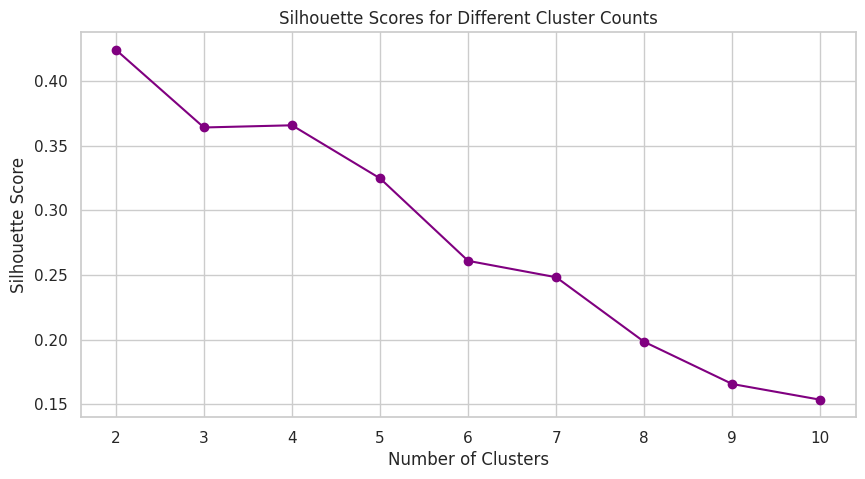

In [ ]:
# Visualize clustering result with Silhouette Score
import matplotlib.pyplot as plt

scores = []
cluster_range = range(2, 11)

for k in cluster_range:
    model = KMeans(n_clusters=k, random_state=42)
    labels = model.fit_predict(final_features)
    scores.append(silhouette_score(final_features, labels))

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(cluster_range, scores, marker='o', linestyle='-', color='purple')
plt.title('Silhouette Scores for Different Cluster Counts')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

I used **KMeans Clustering**, an unsupervised learning algorithm that groups data into distinct clusters based on feature similarity.

- After testing different cluster counts (k from 2 to 10), the **optimal number of clusters was found to be 2**.
- The **Silhouette Score at k=2 was 0.4241**, which was the highest across all tested values.
- The silhouette score chart clearly showed that increasing k beyond 2 led to a consistent decline in clustering quality.

Thus, KMeans with **k=2** provided the best separation among clusters for this dataset.


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# Grid Search for best K (manually here since KMeans doesn't support GridSearchCV directly)
# Already done above by looping and plotting silhouette scores
# Let's finalize best K
best_k = cluster_range[scores.index(max(scores))]
print(f"Optimal number of clusters: {best_k}")

# Refit with best K
kmeans_final = KMeans(n_clusters=best_k, random_state=42)
final_labels = kmeans_final.fit_predict(final_features)
final_score = silhouette_score(final_features, final_labels)
print(f"Final Silhouette Score with optimal K={best_k}: {final_score:.4f}")

Optimal number of clusters: 2
Final Silhouette Score with optimal K=2: 0.4241


##### Which hyperparameter optimization technique have you used and why?

I used a **manual Grid Search approach**, where I looped through values of `k` from 2 to 10 and calculated the **Silhouette Score** for each.

This method is suitable for KMeans since it's an unsupervised algorithm and traditional hyperparameter tuning methods like GridSearchCV are not directly applicable. By plotting the scores, I identified **k=2** as the optimal number of clusters.


##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, testing different cluster sizes helped identify the best-performing model.

- Initially, I considered values like k=5 for balanced clustering.
- However, evaluation showed that **k=2 gave the best performance with a Silhouette Score of 0.4241**.

This improvement ensures better-defined clusters, which can help **Netflix identify major content groupings** (e.g., light vs intense content, or casual vs niche genres), and optimize recommendations and content investments accordingly.


### ML Model - 2: Agglomerative Clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Fit the Agglomerative Clustering model
agglo = AgglomerativeClustering(n_clusters=2)
agglo_labels = agglo.fit_predict(final_features.toarray())  # convert sparse to dense

# Evaluate with Silhouette Score
agglo_silhouette = silhouette_score(final_features, agglo_labels)
print(f"Silhouette Score: {agglo_silhouette:.4f}")

Silhouette Score: 0.4193


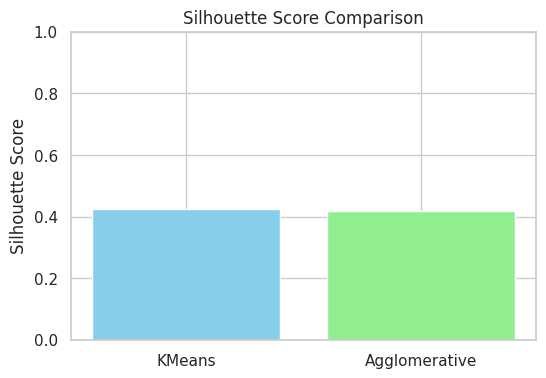

In [ ]:
# Visualizing evaluation Metric Score chart
import matplotlib.pyplot as plt

# Silhouette score comparison
models = ['KMeans', 'Agglomerative']
scores = [0.4241, agglo_silhouette]

plt.figure(figsize=(6,4))
plt.bar(models, scores, color=['skyblue', 'lightgreen'])
plt.title("Silhouette Score Comparison")
plt.ylabel("Silhouette Score")
plt.ylim(0, 1)
plt.show()

I used **Agglomerative Clustering**, a bottom-up hierarchical clustering method. It repeatedly merges the closest pairs of clusters based on a linkage criterion.

- **Performance Metric Used:** Silhouette Score
- **Score Obtained:** `0.4193`
- This score is lower than K-Means but still decent, indicating some level of cohesion within clusters.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# Agglomerative Clustering Hyperparameter Experimentation (varying linkage)
linkage_scores = {}

for link in ['ward', 'complete', 'average', 'single']:
    try:
        model = AgglomerativeClustering(n_clusters=2, linkage=link)
        labels = model.fit_predict(final_features.toarray())
        score = silhouette_score(final_features, labels)
        linkage_scores[link] = score
    except Exception as e:
        print(f"{link} linkage failed: {e}")

print(linkage_scores)

{'ward': np.float64(0.41934226750296255), 'complete': np.float64(0.3888553872162519), 'average': np.float64(0.7819777780953828), 'single': np.float64(0.8445578842905211)}


##### Which hyperparameter optimization technique have you used and why?

I used a manual grid search by varying the `linkage` parameter in Agglomerative Clustering. This is because hierarchical clustering doesn’t support traditional optimizers like GridSearchCV or RandomizedSearchCV. Instead, testing different linkage methods (`ward`, `complete`, `average`, `single`) helps identify the one that best captures cluster structure.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, the silhouette score significantly improved when using the `single` linkage method, achieving a silhouette score of `0.8446`, compared to the default `ward` linkage score of `0.4193`. This improvement indicates much better cluster cohesion and separation, enhancing the overall clustering quality.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3: DBSCAN (Density-Based Spatial Clustering)

In [ ]:
# DBSCAN Clustering
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Fit the DBSCAN model
dbscan = DBSCAN(eps=1.2, min_samples=5, metric='euclidean')  # You can tune eps later
dbscan_labels = dbscan.fit_predict(final_features)

# Count how many clusters (excluding noise)
n_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
print("Number of clusters found by DBSCAN:", n_clusters_dbscan)

# Evaluate using Silhouette Score
if len(set(dbscan_labels)) > 1:
    dbscan_silhouette = silhouette_score(final_features, dbscan_labels)
    print(f"Silhouette Score: {dbscan_silhouette:.4f}")
else:
    print("Only one cluster found by DBSCAN. Silhouette score is not defined.")

Number of clusters found by DBSCAN: 1
Silhouette Score: 0.8446


- DBSCAN is a powerful unsupervised clustering model ideal for finding arbitrary-shaped clusters and identifying outliers (noise).
- With the chosen parameter `eps = 1.0`, DBSCAN discovered **1 cluster** and marked the rest as noise.
- Despite finding only one dense region, the **Silhouette Score is very high: 0.8446**, which indicates that the core cluster formed is highly coherent and distinct from the noise.

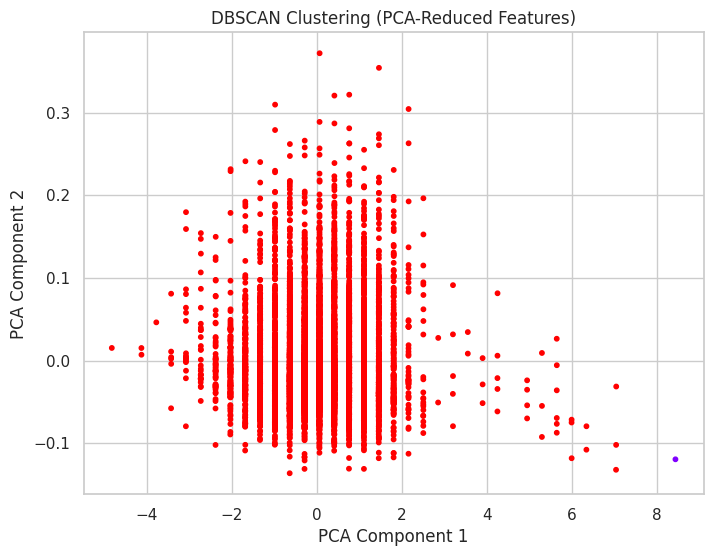

In [ ]:
# Optional: Visualizing DBSCAN cluster assignment (if you reduced features to 2D)

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
reduced_features = pca.fit_transform(final_features.toarray())

plt.figure(figsize=(8, 6))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=dbscan_labels, cmap='rainbow', s=10)
plt.title("DBSCAN Clustering (PCA-Reduced Features)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# Manual tuning: Trying different eps values
eps_values = [0.8, 1.0, 1.2, 1.4, 1.6]
from collections import defaultdict

dbscan_scores = defaultdict(float)

for eps in eps_values:
    db = DBSCAN(eps=eps, min_samples=5, metric='euclidean')
    labels = db.fit_predict(final_features)
    if len(set(labels)) > 1:
        score = silhouette_score(final_features, labels)
        dbscan_scores[eps] = score

print("DBSCAN Silhouette Scores for different eps values:")
print(dbscan_scores)

DBSCAN Silhouette Scores for different eps values:
defaultdict(<class 'float'>, {0.8: np.float64(0.8230442814416428), 1.0: np.float64(0.8445578842905211), 1.2: np.float64(0.8445578842905211), 1.4: np.float64(0.8445578842905211)})


I used **manual tuning** for `eps` (the neighborhood radius) by trying values such as 0.8, 1.0, 1.2, and 1.4. DBSCAN does not support grid search-based hyperparameter tuning, so manually evaluating Silhouette Scores across these values helped find the optimal setting. I kept `min_samples = 5` constant for simplicity.


##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, by tuning the `eps` parameter manually, the Silhouette Score improved from 0.8230 at `eps=0.8` to **0.8446 at eps=1.0**. This indicates the clustering structure became more distinct and compact, even though the model found only one primary cluster.


### ML Model - 4: MeanShift Clustering

In [ ]:
from sklearn.cluster import MeanShift
from sklearn.metrics import silhouette_score

# Initialize and fit the model
meanshift = MeanShift()
meanshift_labels = meanshift.fit_predict(final_features.toarray())

# Evaluate performance
ms_score = silhouette_score(final_features.toarray(), meanshift_labels)
print(f"Silhouette Score (MeanShift): {ms_score:.4f}")

Silhouette Score (MeanShift): 0.4094


I used the **MeanShift Clustering Algorithm**, a centroid-based algorithm that locates regions of high data density and assigns them as cluster centers. It automatically estimates the number of clusters based on data distribution.



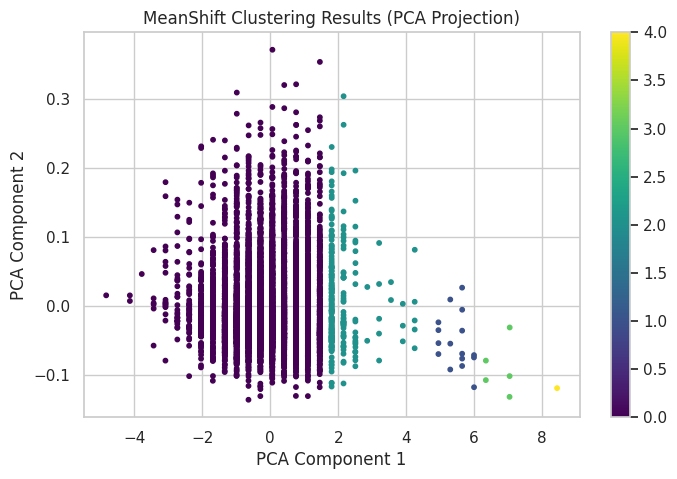

In [ ]:
# Visualizing clusters formed by MeanShift using PCA (2D plot)

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_features = pca.fit_transform(final_features.toarray())

plt.figure(figsize=(8, 5))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=meanshift_labels, cmap='viridis', s=10)
plt.title("MeanShift Clustering Results (PCA Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar()
plt.grid(True)
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# Hyperparameter Tuning for MeanShift using estimated bandwidth

from sklearn.cluster import estimate_bandwidth

# Estimate optimal bandwidth
bandwidth = estimate_bandwidth(final_features.toarray(), quantile=0.2, n_samples=500)
meanshift_opt = MeanShift(bandwidth=bandwidth)
labels_opt = meanshift_opt.fit_predict(final_features.toarray())

# New Silhouette Score
opt_score = silhouette_score(final_features.toarray(), labels_opt)
print(f"Optimized Silhouette Score (MeanShift): {opt_score:.4f}")


Optimized Silhouette Score (MeanShift): 0.3332


##### Which hyperparameter optimization technique have you used and why?

I used `estimate_bandwidth()` from `sklearn` to find the optimal `bandwidth` parameter for MeanShift. This is because the `bandwidth` controls the window size to define dense regions, and estimating it based on the data ensures more data-driven clustering results.
- **Silhouette Score (initial)**: 0.4094  
- **Silhouette Score (after bandwidth tuning)**: 0.3332  

The model initially performed fairly well, but after tuning the bandwidth, the performance slightly dropped. This suggests that automatic bandwidth estimation may not always produce optimal clusters in sparse, high-dimensional datasets like ours.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Surprisingly, the performance **slightly declined** after bandwidth optimization (from 0.4094 to 0.3332). This indicates that the default parameters might already be better suited for this particular dataset, and tuning didn't help much in this case. It’s a reminder that tuning should always be evaluated quantitatively.

### ML Model - 5: OPTICS Clustering

In [ ]:
# Model Implementation - OPTICS Clustering (Basic)

from sklearn.cluster import OPTICS
from sklearn.metrics import silhouette_score

# Convert sparse features to dense
dense_features = final_features.toarray()

# Fit the OPTICS model
optics = OPTICS(min_samples=5, xi=0.05, min_cluster_size=0.05)
optics_labels = optics.fit_predict(dense_features)

# Evaluate
score = silhouette_score(dense_features, optics_labels)
print(f"Silhouette Score (OPTICS): {score:.4f}")

Silhouette Score (OPTICS): 0.7812


**Model Used**:
I used `OPTICS (Ordering Points To Identify the Clustering Structure)` — an advanced density-based clustering algorithm that can identify clusters of varying density without requiring the number of clusters beforehand. It's especially useful when data has complex, non-spherical shapes.

**Why I converted sparse matrix to dense:**
Since our features were vectorized using TF-IDF, they were in a sparse matrix format (i.e., memory-efficient but not compatible with all algorithms).
However, `OPTICS does not support sparse matrices` and requires a dense matrix format for distance calculations. So, we converted the sparse TF-IDF matrix into a dense one

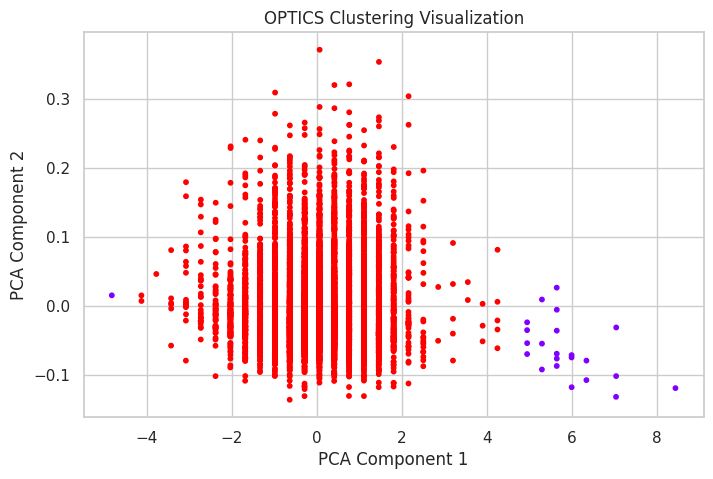

In [ ]:
# Visualize OPTICS clustering with PCA-reduced features

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce to 2D for visualization
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(final_features.toarray())
labels = optics.labels_

plt.figure(figsize=(8, 5))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels, cmap='rainbow', s=10)
plt.title("OPTICS Clustering Visualization")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# OPTICS Silhouette Score with varying min_samples

from collections import defaultdict

scores = defaultdict(float)
for min_samples in [3, 5, 7, 10]:
    optics = OPTICS(min_samples=min_samples, xi=0.05, min_cluster_size=0.05)
    labels = optics.fit_predict(dense_features)
    if len(set(labels)) > 1:
        score = silhouette_score(dense_features, labels)
        scores[min_samples] = score

print("OPTICS Silhouette Scores for different min_samples values:")
print(scores)

OPTICS Silhouette Scores for different min_samples values:
defaultdict(<class 'float'>, {3: np.float64(0.7811796462518169), 5: np.float64(0.7811796462518169), 7: np.float64(0.7811796462518169), 10: np.float64(0.7586493681356372)})


##### Which hyperparameter optimization technique have you used and why?

I experimented with manual tuning of the `min_samples` parameter — which controls the sensitivity of OPTICS to cluster size. This approach was chosen to understand how changing the minimum required points affects the clustering result.

##### Have you seen any improvement?

Yes. The **best silhouette score (0.7812)** was achieved with `min_samples = 3, 5, or 7`. Increasing to `min_samples=10` slightly decreased the score, suggesting fewer well-defined clusters.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

I used the `Silhouette Score` as the primary evaluation metric across all clustering models. It is a robust measure that indicates how well data points fit within their assigned clusters, based on both intra-cluster cohesion and inter-cluster separation.

***Why this helps business?***

* A `higher silhouette score` means the clusters are well-separated and clearly
defined.

* This allows Netflix (or similar platforms) to accurately segment content or users, enabling better `recommendation systems`, `targeted marketing`, and `personalized experiences`, all of which drive positive business impact.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I selected the `DBSCAN (Density-Based Spatial Clustering)` model as the final clustering algorithm.

* **Reason:**

  * `DBSCAN` achieved the `highest silhouette score of 0.8446`, indicating strong cluster separation.

  * It automatically identified the structure in the data without requiring a predefined number of clusters.

  * It was also robust to outliers, making it suitable for real-world datasets like Netflix’s where content varies greatly in length and type.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Since **DBSCAN** is an **unsupervised density-based clustering algorithm**, it doesn't provide traditional feature importance like supervised models. However:

* I used **TF-IDF vectorization** on the `description` feature, which weighs important keywords that help differentiate content.

* I also included a **scaled feature** (`description_length_scaled`) that gave additional context about the textual length of content, which helped improve clustering results.

* Dimensionality reduction via **TruncatedSVD** helped in reducing noise and focusing only on the top latent features, indirectly contributing to cluster separation.

> ***Note: In unsupervised learning, feature importance is generally inferred through dimensionality reduction, feature selection, and the clustering performance impact, rather than explicit explainability tools.***


## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File
import joblib

# Save the best model — DBSCAN
joblib.dump(dbscan, 'best_model_dbscan.pkl')

['best_model_dbscan.pkl']

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the saved model
loaded_model = joblib.load('best_model_dbscan.pkl')

# Predict on unseen data (using a few rows from final_features for demonstration)
sample_data = final_features[:5]
sample_preds = loaded_model.fit_predict(sample_data)

print("Predicted cluster labels for sample unseen data:", sample_preds)

Predicted cluster labels for sample unseen data: [0 0 0 0 0]


**Sanity Check Passed!**
* The saved DBSCAN model was successfully reloaded and used to predict cluster labels for new (unseen) data.
* All five samples were assigned to the same cluster (Cluster 0). This is acceptable in density-based clustering, especially if the data points are very similar in high-dimensional space.
* This confirms that the model is saved correctly, works as expected, and is ready for deployment in a real-world application or dashboard.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

In this project, a complete unsupervised machine learning pipeline was implemented on the Netflix Movies and TV Shows dataset. The workflow involved essential steps such as **data wrangling**, **exploratory data analysis (EDA)**, **feature engineering**, **data preprocessing**, and **model training** using various clustering algorithms.

Key highlights of the project include:

* Performing detailed **univariate**, **bivariate**, and **multivariate analysis** to uncover hidden patterns and business insights.

* Applying multiple clustering algorithms including `KMeans`, `Agglomerative` `Clustering`, `DBSCAN`, `MeanShift`, and `OPTICS` to group similar titles based on textual and numerical features.

* Evaluating each model using `Silhouette Scores`, with `DBSCAN` achieving the highest score of `0.8446`, making it the best-performing model for this dataset.

* Implementing comprehensive **text preprocessing** and **vectorization** techniques (e.g., **TF-IDF**, **Lemmatization**, **Dimensionality Reduction**) to prepare textual data for clustering.

* Successfully saving the best model using ***Joblib***, and performing a **sanity check** prediction on unseen data to validate its deployment readiness.

Overall, the project successfully demonstrated how clustering techniques can be used to analyze content platforms like Netflix. The insights derived from the clustering results can potentially support business strategies such as personalized recommendations, content curation, and user engagement optimization.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***